# Introduction
I am going to be using the K-Means Unsupervised Clustering Algorithm to segment images of lunch trays. <br/> This dataset is meant for supervised learning but I am going to attempt to segment the images without any labels given. <br/>
I am going to cluster pixels based on their spatial and color data only.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os

In [2]:
os.listdir('../input/tray-food-segmentation/TrayDataset/TrayDataset/XTest')

['2002a.jpg',
 '4003a.jpg',
 '5006a.jpg',
 '8006a.jpg',
 '1005a.jpg',
 '6004a.jpg',
 '3004a.jpg',
 '7010a.jpg']

# Load Image

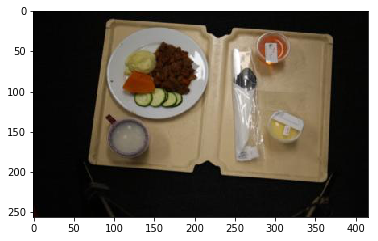

In [3]:
img = Image.open(r'../input/tray-food-segmentation/TrayDataset/TrayDataset/XTest/8006a.jpg')
x = np.array(img)
imshow(x)

# HSV Color Space
![RBG & HSV](https://miro.medium.com/max/1700/1*W30TLUP9avQwyyLfwu7WYA.jpeg)
<br/>
<br/>
<br/>
I'm concatenating the RGB and HSV color spaces. `256x416x3` + `256x416x3` = `256x416x6`

In [4]:
z = np.dstack((x,rgb2hsv(x)))
z.shape

(256, 416, 6)

# K-Means
* The K-Means clustering algorithm only takes 2 dimensional input so I am squishing the X & Y dimension into 1 spatial dimesion
* The new dimensions are now `256*416 x 6` == `106496x6`

In [5]:
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(106496, 6)

* I am picking `K = 8` clusters for this image
* The algorithm starts with `K` cluster centroids that are randomly initialized
* All pixels are then assigned to their nearest cluster centroid
* The cluster centroids are then recalculated and this process repeats until convergence


In [6]:
kmeans = KMeans(random_state=0, init='random', n_clusters=8)
labels = kmeans.fit_predict(vectorized)

Reshaping labels array back into X & Y dimensions to be able to view the images

In [7]:
labels.shape

(106496,)

In [8]:
pic = labels.reshape(256,416)

# Results

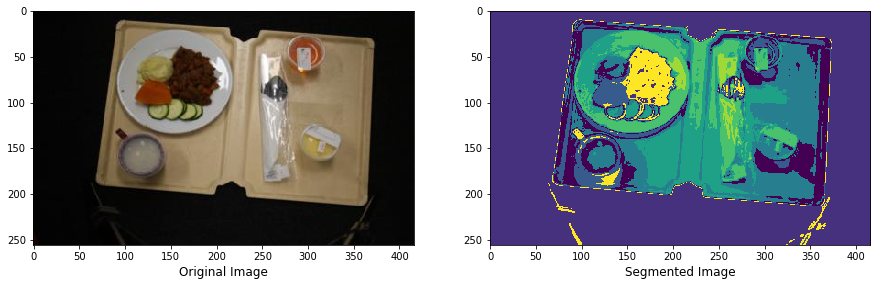

In [9]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

# More Examples

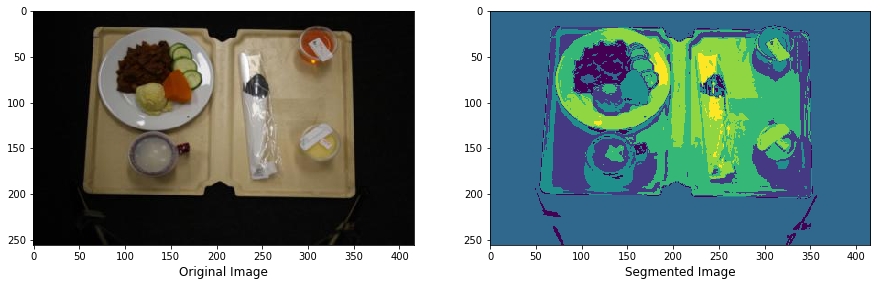

In [10]:
img = Image.open(r'../input/tray-food-segmentation/TrayDataset/TrayDataset/XTest/2002a.jpg')
x = np.array(img)
z = np.dstack((x,rgb2hsv(x)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=7)
james = kmeans.fit_predict(vectorized)
pic = james.reshape(256,416)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)

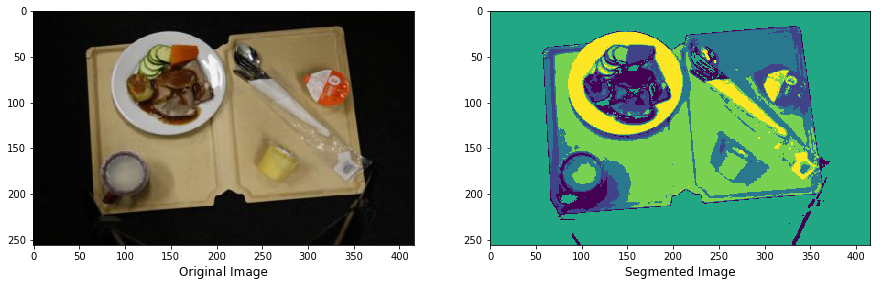

In [11]:
img = Image.open(r'../input/tray-food-segmentation/TrayDataset/TrayDataset/XTest/1005a.jpg')
x = np.array(img)
z = np.dstack((x,rgb2hsv(x)))
z.shape
vectorized = np.float32(z.reshape((-1,6)))
kmeans = KMeans(random_state=32, init='random', n_clusters=6)
james = kmeans.fit_predict(vectorized)
pic = james.reshape(256,416)
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)